# Central Limit Theorem and Sampling

Two great tastes that taste great together

## Conceptual Writing 

![](viz/writing.gif)

#### What is the Central Limit Theorem, and how does it enable us to calculate things about statistics?

In [1]:

print('''
The Central Limit Theorem states that the distribution
of statistics from samples are noramlly distributed.

This allows us to construct a normal distribution
of eg means.  

That procedure is outlined below.  

- From a total population, a sample - a subset from that population - 
is drawn. 

(Best practice is for that sample to be random: each item from 
the population is as equally likely to be chosen as any other item)

- A mean of that sample for a given variable is calculated

- Another sample is drawn from the total population.  Another mean
for the same variable is calculated.

- We repeat, again and again and again, the procedure of drawing
a sample and calculating the mean of that variable.

- When we plot the means, we find they are normally distributed.

- This allows us to use the characteristics of the Normal distribution
to make calculations about a given sample's mean
''')


- The Central Limit Theorem allows us to construct a normal distribution
of means.  That procedure is outlined below.  

- From a total population, a sample - a subset from that population - 
is drawn. 

(Best practice is for that sample to be random: each item from 
the population is as equally likely to be chosen as any other item)

- A mean of that sample for a given variable is calculated

- Another sample is drawn from the total population.  Another mean
for the same variable is calculated.

- We repeat, again and again and again, the procedure of drawing
a sample and calculating the mean of that variable.

- When we plot the means, we find they are normally distributed.

- This allows us to use the characteristics of the Normal distribution
to make calculations about a given sample's mean



## A spot of coding, eh

![](viz/british.gif)

### Import `data.csv` from the `data` folder

This is the same data you saw in the API and Pandas checkpoint yesterday

In [3]:

df = pd.read_csv('data/data.csv')
df.head()

,Unnamed: 0,department,last_name,first_name,job_title,hourly_rate
0,0,Police Department,Aagard,Lori,Pol Lieut,80.07
1,1,Police Department,Aakervik,Dag,Pol Ofcr-Detective,60.84
2,2,Parks & Recreation,Aamot,Allison,Rec Attendant *,17.35
3,3,Seattle Public Utilities,Aar,Abdimallik,"Civil Engrng Spec,Sr",54.07
4,4,Parks & Recreation,Aban,Eduardo,"Civil Engr,Sr",58.36


### Creating a distrbution of means from multiple samples

- Draw 10 random samples from the data of size 250, and for each sample, calculate the mean `hourly_rate`
    - use a list comprehension (the start of the code is provided for
    you)
    - use random_state=`trial` so that we all generate the same samples
      - (why do we assign random_state to a dynamic value?)
    

- Plot a histogram of the 25 means (does this look like any distribution you've seen?)
  - don't forget titles and labels

In [6]:

hourly_rate_sample_means = [
    df.sample(250, random_state=trial, axis=0)
    ['hourly_rate']
    .mean()
    for trial 
    in range(0,10)
]

hourly_rate_sample_means

# #used for tests
# pkl_dump([
#     (hourly_rate_sample_means, 'hourly_rate_sample_means')
# ])

[44.07405760000001,
 43.972035199999986,
 44.36667599999999,
 44.89424960000001,
 45.221464800000014,
 45.85168840000001,
 45.057785599999995,
 46.959132399999994,
 44.51946880000003,
 46.463766400000054]

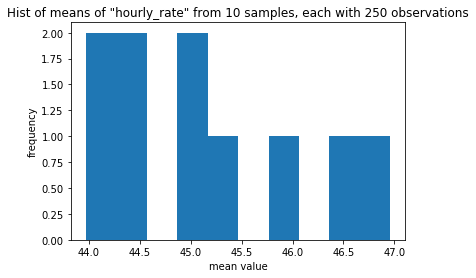

In [28]:

fig, ax = plt.subplots()
ax.hist(hourly_rate_sample_means)
ax.set_title('Hist of means of "hourly_rate" from 10 samples, each with 250 observations')
ax.set_xlabel('mean value')
ax.set_ylabel('frequency')
plt.show()

## Let's do the same thing, but for 30 samples

### Under the Don't Repeat Yourself principle, let's create some functions instead of copying and pasting

#### First, a function to calculate a list of means from samples

Fill in the code below to create a function that:
- takes samples from the imported data
- where the size of the sample is a parameter
- and the number of samples is a parameter
- and `random_state` for each sample is the sample number
  - so for the first sample `random_state` is 1, for the second sample `random_state` is 2, etc.

Then, use the function to assign a list of the means of 30 samples with 250 observations in each sample to the variable `means_30`

*Hint: don't get confused by a parameter of a population and the parameter of a function!*

In [16]:

def sample_and_mean(sample_size, sample_number):
    '''
    takes samples of df and returns list of means of those samples
    
    Parameters:
        sample_size: size of samples to take (int)
        
        sample_number: number of samples to take (int)
        
    output:
        list of sample means
    '''
    
    means = [
    df.sample(sample_size, random_state=trial, axis=0)
    ['hourly_rate']
    .mean()
    for trial 
    in range(0, sample_number)
]
    return means

means_30 = sample_and_mean(250, 30)

#used for tests
# pkl_dump([
#     (means_30, 'means_30')
# ])
# means_30

#### Next, a function to plot the histograms of that list of sample means

We'll use the previous function in this histogram function!

Fill in the code below to create a function that:

- Calls sample_and_mean to generate the data to plot a histogram

- Plots the histogram of the data generated by sample_and_mean
  - Include dynamic titles based on how many samples there are and how many observations in each sample!
  
Then, call the function to create a histogram of the means of 30 samples with 250 observations each

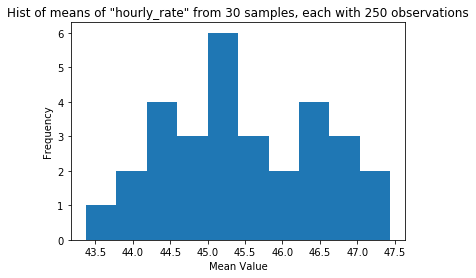

In [30]:

def sample_and_hist(sample_size, sample_number):
    
    '''
    samples df multiple times
    
    finds the mean of `hourly_rate` for each sample
    
    creates a histogram of the results
    
    Parameters:
        sample_size: size of samples to take (int)
        
        sample_number: number of samples to take (int)  
        
    output:
        prints a histogram of means of the samples
    '''
    
    means = sample_and_mean(sample_size, sample_number)
    
    fig, ax = plt.subplots()
    ax.hist(means)
    ax.set_title(f'Hist of means of "hourly_rate" from {sample_number} samples, each with {sample_size} observations')
    ax.set_xlabel('Mean Value')
    ax.set_ylabel('Frequency')
    plt.show()
    
sample_and_hist(250, 30)

### Now that we have this function let's go 

![](viz/ape.gif)

#### Generate three histograms of the means of `hourly_rate` with:
- #### 50, 500, and 5000 samples
- #### 250 observations in each sample

What do you notice?

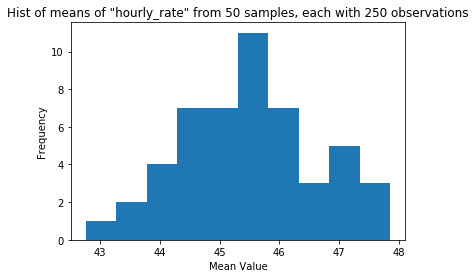

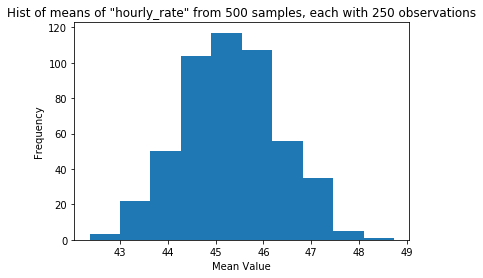

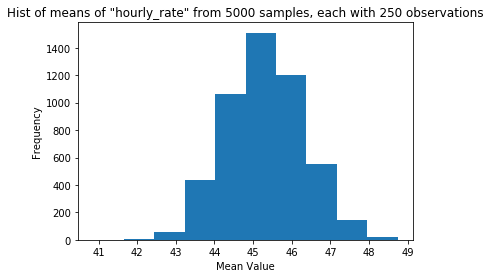

In [31]:

for number in [50, 500, 5000]:
    sample_and_hist(250, number)

#### Generate three histograms of the means of `hourly_rate` with:
- #### 500 samples each 
- #### 50, 500, and 5000 observations in each sample, respectively

What do you notice?

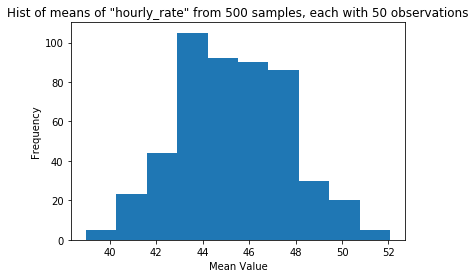

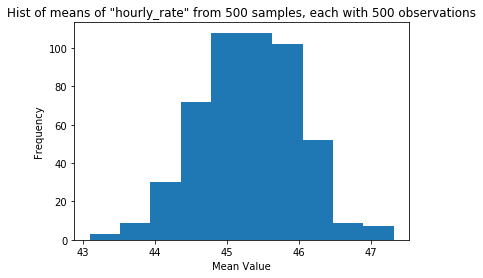

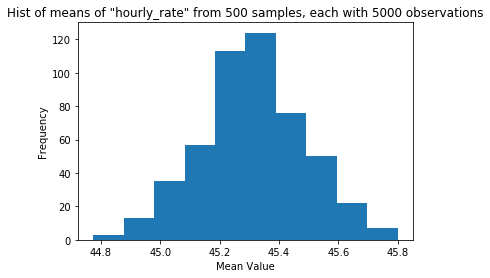

In [35]:
for size in [50, 500, 5000]:
    sample_and_hist(size, 500)